# Wrangle act 
- Gathering 
- assessing 
- clearing
- analys
- visualize

## Importing libiraries

In [2]:
#Importing the required libiraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import xml
import os
import tweepy
from bs4 import BeautifulSoup
import seaborn as sns
import zipfile
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as tim

In [3]:
#diplaying full data
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

# Gathering

### First - image prediction

In [4]:
#Downloading the image-predection file using request libirary
folder_name = "WeRateDogs"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#response.content

In [5]:
#storing the image predection file to the folder_name in this case "WeRateDogs" folder
with open(os.path.join(folder_name, url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

In [6]:
#loading image predictin file into a DataFrame
img_pred = pd.read_csv("WeRateDogs/image-predictions.tsv", sep="\t")
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Second - Twitter enhanced archive

In [7]:
#loading twitter archive as DataFrame
twitter_enhanced = pd.read_csv("WeRateDogs/twitter-archive-enhanced.csv")
twitter_enhanced.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Third - the Downloaded json file

*twitter-api.py downloaded file contents

* Reading data from the downloaded json file 
* store it as DataFrme

In [8]:
# reading tweet-json.txt into a DataFrame
#creating name variable
tweet_json= "WeRateDogs/tweet-json.txt"
#create a list to append json-data to a list 
tweet_data = []
#reading the file using with statement
with open(tweet_json, "r") as file:
    #reading first line
    line = file.readline()
    #looping lines data
    while line:
        #getting the dataframe columns data from the file using while loop
        info = json.loads(line)
        tweet_id_ =  info["id"]
        retweet_count_ = info["retweet_count"]
        favorite_count_ = info["favorite_count"]
        # creating a dictionary to be used as collected data container
        data_dict = {"tweet_id": tweet_id_, "retweet_count": retweet_count_, "favorite_count": favorite_count_}
        tweet_data.append(data_dict)
        #reading next lines
        line = file.readline()
        
#creating the DataFrame 
json_df = pd.DataFrame(tweet_data, columns= ["tweet_id", "retweet_count", "favorite_count"])
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data
## image_prediction

In [9]:
# incase needed to display the whole data in the notebook use t he following
#with pd.option_context('display.max_rows', None):
    #display(img_pred)

In [10]:
print(img_pred.columns)
print(img_pred.info())

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [11]:
#number of unique values in each column
print(img_pred.nunique(axis=0))

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64


In [12]:
img_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
carousel                1
espresso                1
grey_fox                1
military_uniform        1
pencil_box              1
Name: p1, Length: 378, dtype: int64

In [13]:
img_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador_retriever,0.875614,True,Chihuahua,0.032182,True,golden_retriever,0.017232,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True


In [14]:
img_pred.iloc[777]

tweet_id                                 689835978131935233
jpg_url     https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg
img_num                                                   1
p1                                                   collie
p1_conf                                            0.600186
p1_dog                                                 True
p2                                        Shetland_sheepdog
p2_conf                                            0.298939
p2_dog                                                 True
p3                                                   borzoi
p3_conf                                           0.0226156
p3_dog                                                 True
Name: 777, dtype: object

In [15]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#checking lowercased values in p1
lower_bred = img_pred.p1.str.contains('^[a-z]', regex = True)
img_pred[lower_bred].p1.value_counts()

golden_retriever    150
pug                  57
chow                 44
toy_poodle           39
malamute             30
                   ... 
coral_reef            1
platypus              1
bib                   1
carousel              1
pencil_box            1
Name: p1, Length: 298, dtype: int64

In [17]:
#checking lowercased values in p2
lower_bred = img_pred.p2.str.contains('^[a-z]', regex = True)
img_pred[lower_bred].p2.value_counts()

golden_retriever    92
toy_poodle          37
cocker_spaniel      34
miniature_poodle    33
beagle              28
                    ..
cradle               1
polecat              1
television           1
snorkel              1
birdhouse            1
Name: p2, Length: 322, dtype: int64

## Quality
### img_pred
* renaming the columns to a more descreptive
* dropping duplicates

## Tideness issues
### img_pred
* fixing unpivoted columns using whie_to_long function

#dropping the rows that are False with high Confidence and included here to be removed from the values after pivoting
False_ = img_pred_c["Dog"] == False
conf_95 = img_pred_c["Confidence"] >= 0.95
img_pred_c[False_ & conf_95]


In [18]:

print(img_pred.shape)
img_pred.head()
img_pred.info()
img_pred.sample(3)

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True


### what does Value count do :) 
```
True_ = []
False_ = []
not_bool = []
for i in img_pred_c["Dog"]:
    if i == True:
        True_.append(i)
    elif i == False:
        False_.append(i)
    else:
        not_bool.append(i)
print(len(True_))
print(len(False_))
print(len(not_bool))
```

# Second Twitter enhanced archive
### Quality issues
* name column has 745 None's, 
* there are 109 lowercase that are not valid names eg(a, "O", "by", "all", "the", "this".
* "timestamp" column last 6 charachters " +0000"
* "timestamp" column needs to be datetime type
* 78 replies
* 181 retweeted
* there are 281 missing urls
* 

## Tideness
* category columns 'doggo', 'floofer', 'pupper', 'puppo' needs to be merged into 1 column "dog_category"

In [19]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
#assessing the data of twitter archive
print(twitter_enhanced.shape)
list(twitter_enhanced)

(2356, 17)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [21]:
#how many expanded urls are not retweets and not replies
sum(twitter_enhanced.retweeted_status_id.isna() & twitter_enhanced.in_reply_to_status_id.isna() & twitter_enhanced.expanded_urls.isna())

3

In [22]:
#how many expanded urls are not retweets and not replies
not_ret_rep = twitter_enhanced.retweeted_status_id.isna() & twitter_enhanced.in_reply_to_status_id.isna() & twitter_enhanced.expanded_urls.isna()
twitter_enhanced.tweet_id[not_ret_rep]

375     828361771580813312
707     785515384317313025
1445    696518437233913856
Name: tweet_id, dtype: int64

In [23]:
#searching for those 3 tweets within the prediction data
tweets_3 = twitter_enhanced.tweet_id[not_ret_rep]
sum(img_pred.tweet_id.isin(tweets_3))

0

In [24]:
#searching for those 3 tweets within the json data
sum(json_df.tweet_id.isin(tweets_3))

3

* these 3 tweets are found in the json but not in image prediction 

In [25]:
#Number of tweets with missing urls
twitter_enhanced.expanded_urls.isnull().sum()

59

In [26]:
#Then we predict that number of retweets and replies with missing urls are 56 and as follows
sum(twitter_enhanced.expanded_urls.isna() & (twitter_enhanced.in_reply_to_status_id.notnull() | twitter_enhanced.retweeted_status_id.notnull()))

56

In [27]:
#rating_numerator and rating_denominator
twitter_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [28]:
#checking the values of rating denominator
twitter_enhanced.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [29]:
#tweets with denominator != 10
print(sum(twitter_enhanced.rating_denominator != 10))
twitter_enhanced[twitter_enhanced.rating_denominator != 10]

23


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [30]:
#denomirators that are not 10, not retweets and not replies with relat_columns 
deno_not_10 = (twitter_enhanced.rating_denominator != 10) & \
            twitter_enhanced.in_reply_to_status_id.isna() & \
            twitter_enhanced.retweeted_status_id.isna()
relat_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_enhanced[deno_not_10][relat_cols]


,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50


In [31]:
# number of tweets that are not retweet or replies with denomirator not 10
sum(deno_not_10)

17

In [32]:
#value counts of the numerator
twitter_enhanced.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [33]:
print(twitter_enhanced["puppo"].value_counts())
print(twitter_enhanced["pupper"].value_counts())
print(twitter_enhanced["floofer"].value_counts())

None     2326
puppo      30
Name: puppo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64


In [34]:
#Lowercased values within the "name" column
not_names = twitter_enhanced["name"].str.contains('^[a-z]', regex = True)
twitter_enhanced[not_names].name.value_counts()


a               55
the              8
an               7
very             5
just             4
one              4
quite            4
actually         2
mad              2
not              2
getting          2
his              1
such             1
unacceptable     1
old              1
incredibly       1
light            1
my               1
space            1
infuriating      1
by               1
officially       1
life             1
this             1
all              1
Name: name, dtype: int64

In [35]:
#Total number of lowercased values included in "name" column
len(twitter_enhanced[not_names])

109

In [36]:
#Reading the whole rows in the notebook
#with pd.option_context('display.max_rows', None):
    #display(twt_enh_c)

# Third tweet-json 
## json_df Quality
* 

## json_df Tideness
* 

In [37]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [39]:
json_df.sample(3)

,tweet_id,retweet_count,favorite_count
782,775350846108426240,4532,11309
2161,669375718304980992,792,1425
1273,709179584944730112,763,2213


In [40]:
json_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [41]:
json_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Length: 2354, dtype: bool

# Cleaning Data

## img_pred_c cleaning
### Define
* renaming the columns to a more descreptive
* un pivoting columns using whide_to_long function
* dropping duplicates

## Code

In [42]:
#transforming the column shape and merging the columns
img_pred_c = img_pred.copy()

In [43]:
#renaming the columns

img_pred_c.rename(columns={"p1":"breed_1","p1_conf":"confidence_1",'p1_dog':"dog_1",
                          "p2":"breed_2","p2_conf":"confidence_2",'p2_dog':"dog_2",
                          "p3":"breed_3","p3_conf":"confidence_3",'p3_dog':"dog_3"}, inplace=True)

In [44]:
#combining columns
img_pred_c = pd.wide_to_long(img_pred_c,stubnames=["breed","confidence","dog"], i=["tweet_id","jpg_url", "img_num"], j="predection_#",sep="_").reset_index()


In [45]:
#not_Breed = img_pred_c["breed"].str.contains('^[a-z]', regex = True)
#img_pred_c[not_Breed]["breed"].value_counts()

In [46]:
img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      6225 non-null   int64  
 1   jpg_url       6225 non-null   object 
 2   img_num       6225 non-null   int64  
 3   predection_#  6225 non-null   int64  
 4   breed         6225 non-null   object 
 5   confidence    6225 non-null   float64
 6   dog           6225 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [47]:
#replacing lowercase G of golden retriever to extract all non valid lower words
img_pred_c["breed"] = img_pred_c["breed"].str.replace("golden_retriever","Golden_retriever")

In [48]:
# replacing the non valid words in the breed column with "None" using regex
not_valid = img_pred_c["breed"].str.contains('^[a-z]', regex = True)
img_pred_c.loc[not_valid, 'breed'] = "None"

In [49]:
#dropping duplicated values caused by wide_to_long
img_pred_c = img_pred_c[~img_pred_c.tweet_id.duplicated()]

## Test

In [50]:
img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   predection_#  2075 non-null   int64  
 4   breed         2075 non-null   object 
 5   confidence    2075 non-null   float64
 6   dog           2075 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 115.5+ KB


# Second Twitter ennhanced cleaning

## Define
* timestamp column has " +0000" will be removed
* 'timestamp" column will be converted using to_datetime()
* "name" column has some names that are lowercased and not a valid names replacing with "None".
* we have 181 retweets not needed.
* we have 78 replies which not needed.
* source column can be simplefied.
* dropping the tweets with rating denomirator bigger than 10 as "not valid, many dogs"
* dog category columns will be merged in 1 column "dog_category
* breed column has some non related words begin with lower words

## Code

In [51]:
#creating a copy first
twt_enh_c = twitter_enhanced.copy()

In [52]:
twitter_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Cora         1
this         1
Charl        1
Meera        1
Ronduh       1
Name: name, Length: 957, dtype: int64

In [53]:
#Removing the last 6 charachters from the timestamp values 
twt_enh_c['timestamp'] = twt_enh_c['timestamp'].str.strip('+0000')

In [54]:
#converting timestamp to_datetime
twt_enh_c['timestamp'] =  pd.to_datetime(twt_enh_c['timestamp'])

In [55]:
#replacing None with empty strings
twt_enh_c.doggo = twt_enh_c["doggo"].str.replace("None","")
twt_enh_c.floofer = twt_enh_c.floofer.str.replace("None","")
twt_enh_c.pupper = twt_enh_c.pupper.str.replace("None","")
twt_enh_c.puppo = twt_enh_c.puppo.str.replace("None","")

In [56]:
#adding the dog stage columns together to have stages in 1 column
twt_enh_c["dog_stage"] = twt_enh_c.doggo + twt_enh_c.floofer + twt_enh_c.pupper + twt_enh_c.puppo

In [57]:
#dropping the columns after crated the dog_stage column
twt_enh_c.drop(columns=["doggo", "floofer","pupper","puppo"], inplace = True)

In [58]:
#making the dog_stage more readable by adding "-" between 2 stages with the same dog
twt_enh_c["dog_stage"] = twt_enh_c["dog_stage"].replace({"doggopupper": "doggo-pupper",
                                   "doggopuppo":"doggo-puppo",
                                   "doggofloofer":"doggo-floofer"})

In [59]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [60]:
#dropping replies
twt_enh_c = twt_enh_c[twt_enh_c.in_reply_to_status_id.isna()]

In [61]:
#dropping the columns
twt_enh_c.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id"], inplace= True)

In [62]:
#dropping retweets
twt_enh_c = twt_enh_c[twt_enh_c.retweeted_status_id.isna()]

In [63]:
#dropping the columns
twt_enh_c.drop(columns=["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], inplace= True)

In [64]:
#using regex to extract the source between  <a href=""> and </a>
twt_enh_c['source'] = twt_enh_c['source'].str.extract('^<a.+>(.+)</a>$')

In [65]:
#dropping tweets with denominator bigger than 10
twt_enh_c = twt_enh_c[twt_enh_c.rating_denominator == 10]

In [66]:
twt_enh_c.rating_denominator.value_counts().sort_index(ascending=False)

10    2080
Name: rating_denominator, dtype: int64

### i picked 14 in the next cell as it represent the start of the multi observations for 1 rating and it is kinda in the middle

In [67]:
#dropping the rating numerator bigger than 14 as it is the start of multi observation per value
twt_enh_c = twt_enh_c[twt_enh_c.rating_numerator <= 14]

In [68]:
twt_enh_c['rating_numerator'].sample(1)

389    12
Name: rating_numerator, dtype: int64

In [69]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   int64         
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   expanded_urls       2072 non-null   object        
 5   rating_numerator    2075 non-null   int64         
 6   rating_denominator  2075 non-null   int64         
 7   name                2075 non-null   object        
 8   dog_stage           2075 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.1+ KB


In [70]:
#dropping the missing urls rows
twt_enh_c = twt_enh_c[twt_enh_c.expanded_urls.notnull()]

In [71]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2072 non-null   int64         
 1   timestamp           2072 non-null   datetime64[ns]
 2   source              2072 non-null   object        
 3   text                2072 non-null   object        
 4   expanded_urls       2072 non-null   object        
 5   rating_numerator    2072 non-null   int64         
 6   rating_denominator  2072 non-null   int64         
 7   name                2072 non-null   object        
 8   dog_stage           2072 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 161.9+ KB


In [72]:
#constructing a function to find and replace the lowercased words in "name" column
names=[]
def lower_names(row):
    if row["name"][0].islower() == True:
        names.append("None")
    else:
        names.append(row["name"])
        
#using the apply function to call the function
twt_enh_c.apply(lower_names, axis=1)
twt_enh_c["name"] = names


# Test

In [ ]:
twt_enh_c.head()

In [ ]:
twt_enh_c.info()

In [ ]:
twt_enh_c.describe()

In [ ]:
twt_enh_c.name.value_counts()

In [ ]:
twt_enh_c.dog_stage.value_counts()

In [ ]:
twt_enh_c.source.value_counts()

## json_df cleaning
### Define
* This DataFrame should be a part of twitter-archive Dataframe

In [73]:
# Making a copy of the DataFrame
json_df_c = json_df.copy()
json_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [74]:
# Merging the json_df and twt_enh_c

twt_enh_c = pd.merge(twt_enh_c, json_df_c, 
                         on = 'tweet_id', how = 'left')

In [155]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2072 non-null   int64         
 1   timestamp           2072 non-null   datetime64[ns]
 2   source              2072 non-null   object        
 3   text                2072 non-null   object        
 4   expanded_urls       2072 non-null   object        
 5   rating_numerator    2072 non-null   int64         
 6   rating_denominator  2072 non-null   int64         
 7   name                2072 non-null   object        
 8   dog_stage           2072 non-null   object        
 9   retweet_count       2072 non-null   int64         
 10  favorite_count      2072 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 194.2+ KB


In [156]:
img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   predection_#  2075 non-null   int64  
 4   breed         2075 non-null   object 
 5   confidence    2075 non-null   float64
 6   dog           2075 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 115.5+ KB


In [75]:
# merge the breed and confidence columns to twitter enhanced archive
merge_cols = ['tweet_id', 'breed', 'confidence']
twt_enh_c = pd.merge(twt_enh_c, img_pred_c[merge_cols],
                         on = 'tweet_id', how = 'inner')

In [76]:
img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   predection_#  2075 non-null   int64  
 4   breed         2075 non-null   object 
 5   confidence    2075 non-null   float64
 6   dog           2075 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 115.5+ KB


In [77]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1949 non-null   int64         
 1   timestamp           1949 non-null   datetime64[ns]
 2   source              1949 non-null   object        
 3   text                1949 non-null   object        
 4   expanded_urls       1949 non-null   object        
 5   rating_numerator    1949 non-null   int64         
 6   rating_denominator  1949 non-null   int64         
 7   name                1949 non-null   object        
 8   dog_stage           1949 non-null   object        
 9   retweet_count       1949 non-null   int64         
 10  favorite_count      1949 non-null   int64         
 11  breed               1949 non-null   object        
 12  confidence          1949 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), obje

In [160]:
twt_enh_c.rating_denominator.value_counts()

10    1949
Name: rating_denominator, dtype: int64

In [78]:
# all values within the rating_denominator column are 10's so  i will drop it 
twt_enh_c.drop("rating_denominator", axis=1, inplace=True)

In [79]:
twt_enh_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1949 non-null   int64         
 1   timestamp         1949 non-null   datetime64[ns]
 2   source            1949 non-null   object        
 3   text              1949 non-null   object        
 4   expanded_urls     1949 non-null   object        
 5   rating_numerator  1949 non-null   int64         
 6   name              1949 non-null   object        
 7   dog_stage         1949 non-null   object        
 8   retweet_count     1949 non-null   int64         
 9   favorite_count    1949 non-null   int64         
 10  breed             1949 non-null   object        
 11  confidence        1949 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 197.9+ KB


In [98]:
plt.plot(twt_enh_c["tweet_id"],twt_)

,breed,expanded_urls
905,Golden_retriever,https://twitter.com/dog_rates/status/717047459982213120/photo/1
1399,None,https://twitter.com/dog_rates/status/678021115718029313/photo/1
1068,None,https://twitter.com/dog_rates/status/700062718104104960/photo/1


# Storing Data

In [80]:
twt_enh_c.to_csv("WeRateDogs/twitter_archive_master.csv")

# Analyze Data

### I was wondering what is the most used name for dogs within this period
* and Tableau made it easy

In [84]:
%%html
<div class='tableauPlaceholder' id='viz1601622832119' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;namecloud&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WeRateDogs_16015868853330&#47;namecloud' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;namecloud&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601622832119');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* from above cloud it seems most fav names are charlie oliver and cooper for males and lucy for females

### The next one is about how was the interaction was in this period from noverbmer 2015 till August 2017 
* lets see the average number of retweets and favorits counts

In [85]:
%%html
<div class='tableauPlaceholder' id='viz1601623094161' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;avgretweetandfavbyyear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WeRateDogs_16015868853330&#47;avgretweetandfavbyyear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;avgretweetandfavbyyear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601623094161');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* and it seems people prefer to favorite more than retweeting

(array([1911.,    0.,    0.,    0.,    0.,   28.,    0.,    0.,    0.,
          10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

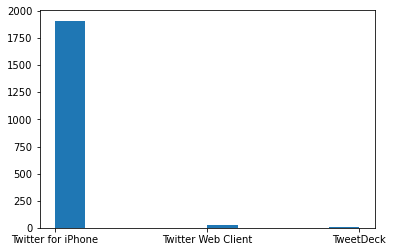

In [99]:
#Lets check the most used source to plan our next campain platforms
plt.hist(twt_enh_c.source)

* Twitter for iphone win which mean any ads on the page should be compatiple with iphones the most also there is no tweetdeck for 2017 but not shown in this viz

## lets check the favorite count and retweet count on average 
* is there a relationship and what is the most breed to get fav's and retweets

In [104]:
%%html
<div class='tableauPlaceholder' id='viz1601629447523' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_2more&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WeRateDogs_2more&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_2more&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601629447523');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* It seems that retweeting and favoriting has a correlation and the lakeland_terrier got the most favs and the eskimo_dog got the most retweets

## Lets check the number of tweets with high rating per month 
* i wanted to use daily but it will be a very busy visualization 

In [105]:
%%html
<div class='tableauPlaceholder' id='viz1601629703470' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_2more&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WeRateDogs_2more&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_2more&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601629703470');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* for above viz any above reference line are tweets with good ratings higher than 10.5 the average

## Lets check the most favorite breed per for each year

In [106]:
%%html
<div class='tableauPlaceholder' id='viz1601633458630' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WeRateDogs_16015868853330&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;WeRateDogs_16015868853330&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1601633458630');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* for 2015 the most favorite is chihuahua for 2016 golden retriever for 2017 it is golden retriever also
## retrievers are winners :)